In [36]:
import statsmodels.api as sm
from scipy import stats
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('..\data/beijingHouse.csv', encoding='utf-8')

df_ana = df
df_ana.head()  # 样本取样

,CATE,bedrooms,halls,AREA,floor,subway,school,price,LONG,LAT,NAME,DISTRICT
0,chaoyang,1,0,46.06,middle,1,0,48850,116.459653,39.928347,10AM新坐标,方庄
1,chaoyang,1,1,59.09,middle,1,0,46540,116.459653,39.928347,10AM新坐标,方庄
2,haidian,5,2,278.95,high,1,1,71662,116.303556,39.954807,10号名邸,紫竹桥
3,haidian,3,2,207.00,high,1,1,57972,116.303556,39.954807,10号名邸,紫竹桥
4,fengtai,2,1,53.32,low,1,1,71268,116.418826,39.943813,17号旁门,蒲黄榆


In [37]:
df_ana.shape

(16210, 12)

In [69]:
# 查看重复值
df_ana.duplicated().sum()

0

In [70]:
# 查看缺失值
df_ana.isnull().sum()

CATE          0
bedrooms      0
halls         0
AREA          0
floor         0
subway        0
school        0
price         0
LONG          0
LAT           0
NAME          0
DISTRICT      0
have_halls    0
dtype: int64

In [38]:
# 将价格单位转化为万元
df_ana['price'] = df_ana['price']/10000
df_ana.head(3)

,CATE,bedrooms,halls,AREA,floor,subway,school,price,LONG,LAT,NAME,DISTRICT
0,chaoyang,1,0,46.06,middle,1,0,4.8850,116.459653,39.928347,10AM新坐标,方庄
1,chaoyang,1,1,59.09,middle,1,0,4.6540,116.459653,39.928347,10AM新坐标,方庄
2,haidian,5,2,278.95,high,1,1,7.1662,116.303556,39.954807,10号名邸,紫竹桥


In [39]:
# 将CATE（城区）列转化为中文
city_en = df_ana['CATE'].drop_duplicates().tolist() # 移除重复值，转换为列表
city_en.sort() # 对列表排序
print(city_en)


# 匹配中英文
city_zh = ['朝阳', '东城', '丰台', '海淀', '石景山', '西城']
dict_map = dict()
for i in range(0, len(city_en)):
    dict_map[city_en[i]] = city_zh[i]
print(dict_map)


# 用汉字替换拼音
for x in dict_map.keys():
    df_ana['CATE'] = df_ana['CATE'].str.replace(x, dict_map[x])
df_ana.head()

['chaoyang', 'dongcheng', 'fengtai', 'haidian', 'shijingshan', 'xicheng']
{'chaoyang': '朝阳', 'dongcheng': '东城', 'fengtai': '丰台', 'haidian': '海淀', 'shijingshan': '石景山', 'xicheng': '西城'}


,CATE,bedrooms,halls,AREA,floor,subway,school,price,LONG,LAT,NAME,DISTRICT
0,朝阳,1,0,46.06,middle,1,0,4.8850,116.459653,39.928347,10AM新坐标,方庄
1,朝阳,1,1,59.09,middle,1,0,4.6540,116.459653,39.928347,10AM新坐标,方庄
2,海淀,5,2,278.95,high,1,1,7.1662,116.303556,39.954807,10号名邸,紫竹桥
3,海淀,3,2,207.00,high,1,1,5.7972,116.303556,39.954807,10号名邸,紫竹桥
4,丰台,2,1,53.32,low,1,1,7.1268,116.418826,39.943813,17号旁门,蒲黄榆


In [40]:
# 根据楼层排序
df_ana = df_ana.sort_values(by=['floor'], axis=0, ascending=True)
df_ana

,CATE,bedrooms,halls,AREA,floor,subway,school,price,LONG,LAT,NAME,DISTRICT
6039,石景山,3,1,117.15,high,1,0,4.5242,116.223960,39.912220,碣石坪,鲁谷
14188,西城,4,1,126.34,high,0,1,5.9997,116.364987,39.879207,右安门内西街1号院,右安门内
5990,丰台,5,2,194.62,high,1,0,2.6719,116.382576,39.843989,角门甲8号院,角门
11349,朝阳,3,1,123.00,high,1,0,3.9675,116.600192,39.932039,万象新天四区,常营
5986,丰台,2,1,54.44,high,1,0,3.5820,116.382576,39.843989,角门甲120号院,角门
...,...,...,...,...,...,...,...,...,...,...,...,...
8197,石景山,2,1,63.03,middle,0,0,2.8717,116.160078,39.938323,模式口西里,苹果园
8194,石景山,2,1,63.10,middle,0,0,2.9002,116.160078,39.938323,模式口西里,苹果园
8192,石景山,2,1,55.71,middle,0,0,2.9080,116.160078,39.938323,模式口西里,苹果园
8297,朝阳,2,1,54.40,middle,1,0,5.0552,116.461937,39.997124,南湖渠西里,望京


Text(0, 0.5, '频度')

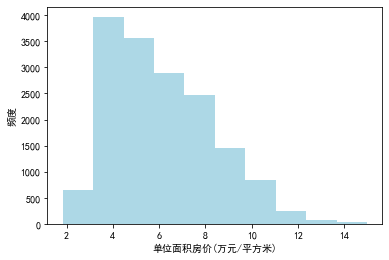

In [41]:
plt.hist(df_ana['price'], color='lightblue')
plt.xlabel('单位面积房价(万元/平方米)')
plt.ylabel('频度')

In [42]:
df_ana['price'].describe()

count    16210.000000
mean         6.115181
std          2.229336
min          1.834800
25%          4.281225
50%          5.747300
75%          7.609975
max         14.987100
Name: price, dtype: float64

In [43]:
df_price_middle = df_ana['price'].median()

print('中位数：', df_price_middle)

中位数： 5.7473


Text(0.5, 0, '城区')

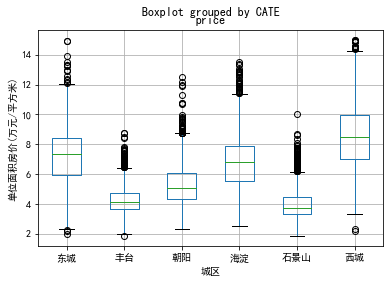

In [44]:
# 绘制房价的分组箱线图

df_ana.boxplot(column=["price"], by=['CATE'])
plt.ylabel("单位面积房价(万元/平方米)")
plt.xlabel("城区")

<AxesSubplot:title={'center':'price'}, xlabel='[subway]'>

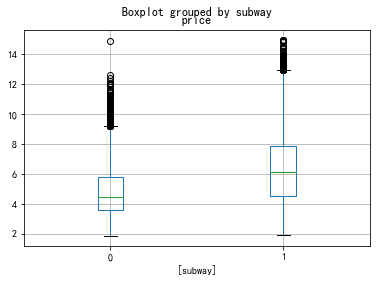

In [45]:
# 地铁、学区的分组箱线图

df_ana.boxplot(column=['price'], by=['subway'], labels=['非地铁房', '地铁房'])

<AxesSubplot:title={'center':'price'}, xlabel='[school]'>

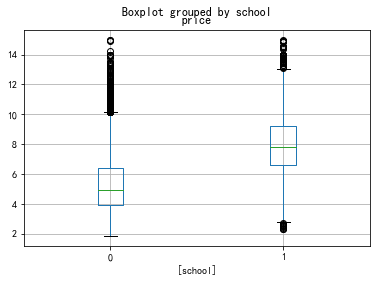

In [46]:
df_ana.boxplot(column=['price'], by=['school'], labels=['非学区房', '学区房'])

<AxesSubplot:title={'center':'price'}, xlabel='[bedrooms]'>

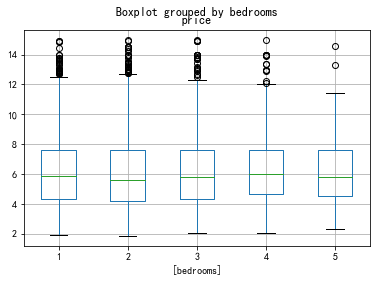

In [47]:
# 考察房源，客厅、卧室和楼层是否对价格有影响

df_ana.boxplot(column=['price'], by=['bedrooms'])

<AxesSubplot:title={'center':'price'}, xlabel='[halls]'>

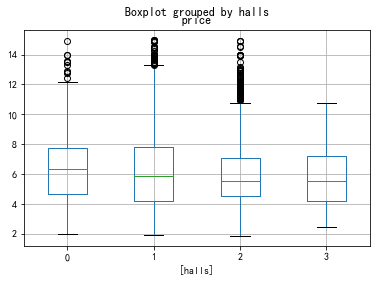

In [48]:
# 考察客厅数量对房价的影响：

df_ana.boxplot(column=['price'], by=['halls'])

<AxesSubplot:title={'center':'price'}, xlabel='[floor]'>

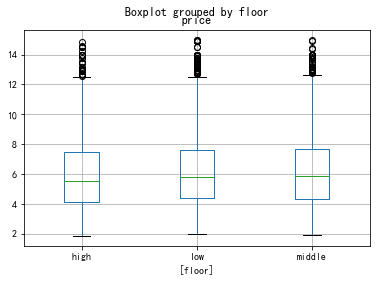

In [49]:
# 考察楼层高低对房价的影响：

df_ana.boxplot(column=['price'], by=['floor'])

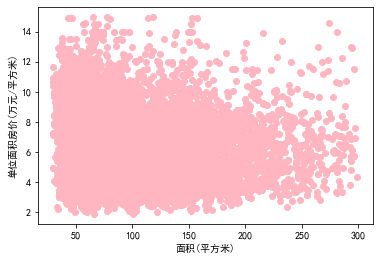

In [50]:
# 考察房屋面积和单位价格的关系

plt.plot(df_ana['AREA'], df_ana['price'], 'o', color='lightpink')
plt.xlabel('面积(平方米)')
plt.ylabel('单位面积房价(万元/平方米)')
plt.show()

In [51]:
# 建立线性回归模型

# 客厅数做因子化处理，变成二分变量，使得建模有更好的解读。

def fun(x):
    if isinstance(x, int):
        if x == 0:
            return 0
        else:
            return 1
    else:
        return 0


style_halls = df_ana
df_ana['have_halls'] = df_ana['halls'].apply(lambda x: fun(x))
col_n = ['CATE', 'bedrooms', 'AREA', 'floor', 'subway', 'school', 'have_halls']

In [52]:
# 将变量参数数据化

y = df_ana.price
x = pd.DataFrame(df_ana, columns=col_n)  # 设置自变量x
x_dum_cate = pd.get_dummies(x['CATE'])  # 对哑变量编码
x_dum_floor = pd.get_dummies(x['floor'])  # 对哑变量编码
del x['CATE']
del x['floor']
x = pd.concat([x, x_dum_cate], axis=1)
x = pd.concat([x, x_dum_floor], axis=1)
X = sm.add_constant(x)  # 增加截距项

In [53]:
# 查看数据：
X.head()

,const,bedrooms,AREA,subway,school,have_halls,东城,丰台,朝阳,海淀,石景山,西城,high,low,middle
6039,1.0,3,117.15,1,0,1,0,0,0,0,1,0,1,0,0
14188,1.0,4,126.34,0,1,1,0,0,0,0,0,1,1,0,0
5990,1.0,5,194.62,1,0,1,0,1,0,0,0,0,1,0,0
11349,1.0,3,123.00,1,0,1,0,0,1,0,0,0,1,0,0
5986,1.0,2,54.44,1,0,1,0,1,0,0,0,0,1,0,0


In [54]:
# 线性回归模型（因变量：单位面积房价）：

model = sm.OLS(y, X)
result = model.fit()
result.params  # 显示回归系数

const         3.326761
bedrooms      0.111101
AREA         -0.002780
subway        0.672102
school        1.183122
have_halls    0.171935
东城            1.439778
丰台           -0.871941
朝阳           -0.128141
海淀            1.187993
石景山          -1.003265
西城            2.702337
high          0.992039
low           1.190565
middle        1.144157
dtype: float64

In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     1945.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:55:27   Log-Likelihood:                -28762.
No. Observations:               16210   AIC:                         5.755e+04
Df Residuals:                   16197   BIC:                         5.765e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3268      0.041     81.568      0.000       3.247       3.407
bedrooms       0.1111      0.020      5.500      0.000       0.072       0.151
AREA          -0.0028      0.000     -7.393      0.000      -0.004      -0.002
subway         0.6721      0.031     21.741      0.000       0.612       0.733
school         1.1831      0.028     42.607      0.000       1.129       1.238
have_halls     0.1719      0.053      3.260      0.001       0.069       0.275
东城             1.4398      0.027     54.157      0.000       1.388       1.492
丰台            -0.8719      0.026    -33.491      0.000      -0.923      -0.821
朝阳            -0.1281      0.027     -4.816      0.000      -0.180      -0.076
海淀             1.1880      0.026     45.562      0.000       1.137       1.239
石景山           -1.0033      0.031    -32.687      0.000      -1.063      -0.943
西城             2.7023      0.027     99.490      0.000       2.649       2.756
high           0.9920      0.021     46.903      0.000       0.951       1.033
low            1.1906      0.021     56.465      0.000       1.149       1.232
middle         1.1442      0.021     55.710      0.000       1.104       1.184
==============================================================================
Omnibus:                     1279.281   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2206.275
Skew:                           0.583   Prob(JB):                         0.00
Kurtosis:                       4.380   Cond. No.                     4.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.62e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
y_hat = result.predict(X)
residuals = y-y_hat
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

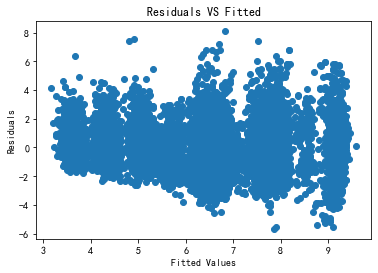

In [57]:
#  验证模型是否符合线性模型

plt.title('Residuals VS Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y_hat, residuals)

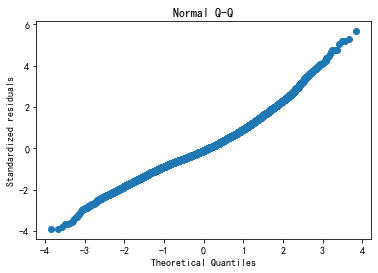

In [58]:
# 6.4.12 验证房价是否是正太分布

residuals_n = (residuals-np.mean(residuals))/np.std(residuals)
sorted_ = np.sort(residuals_n)
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)

plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized residuals')
plt.scatter(x_label, sorted_)

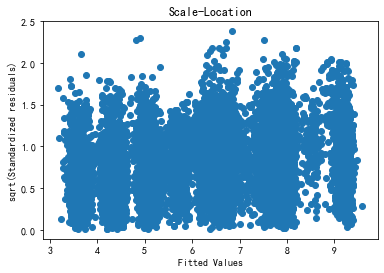

In [59]:
# 6.5 复杂绘图分析

# 6.5.1 换一种方法重新验证模型是否符合线性模型


residuals_sq = np.sqrt(abs(residuals_n))
plt.title('Scale-Location')
plt.xlabel('Fitted Values')
plt.ylabel('sqrt(Standardized residuals)')
plt.scatter(y_hat, residuals_sq)

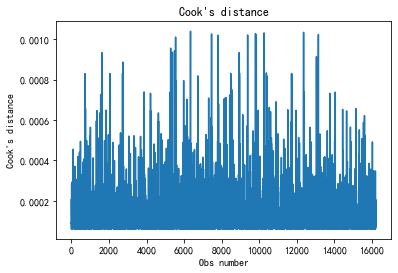

In [60]:
# 6.5.2 考察样本异常值

n = len(y)
y_m = np.mean(y)
Lyy = np.sum((y-y_m)**2)
Hii = 1/n+(y-y_m)**2/Lyy

plt.title("Cook's distance")
plt.xlabel('Obs number')
plt.ylabel("Cook's distance")
plt.plot(Hii.tolist())

In [61]:
# 6.5.3 取对数后重新做以上验证

# 对房价取对数，得到——y_log
y_log = df_ana['price'].apply(lambda x: math.log(x))
# 对数房价回归模型
model = sm.OLS(y_log, X)
result = model.fit()
result.params

const         1.033541
bedrooms      0.014056
AREA         -0.000351
subway        0.128150
school        0.171905
have_halls    0.027504
东城            0.335556
丰台           -0.078024
朝阳            0.083502
海淀            0.309828
石景山          -0.122149
西城            0.504827
high          0.324561
low           0.358446
middle        0.350534
dtype: float64

In [62]:
# 考察模型参数：

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2095.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:55:27   Log-Likelihood:                 977.77
No. Observations:               16210   AIC:                            -1930.
Df Residuals:                   16197   BIC:                            -1830.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0335      0.007    158.712      0.000       1.021       1.046
bedrooms       0.0141      0.003      4.358      0.000       0.008       0.020
AREA          -0.0004      6e-05     -5.842      0.000      -0.000      -0.000
subway         0.1282      0.005     25.963      0.000       0.118       0.138
school         0.1719      0.004     38.772      0.000       0.163       0.181
have_halls     0.0275      0.008      3.266      0.001       0.011       0.044
东城             0.3356      0.004     79.050      0.000       0.327       0.344
丰台            -0.0780      0.004    -18.770      0.000      -0.086      -0.070
朝阳             0.0835      0.004     19.654      0.000       0.075       0.092
海淀             0.3098      0.004     74.421      0.000       0.302       0.318
石景山           -0.1221      0.005    -24.925      0.000      -0.132      -0.113
西城             0.5048      0.004    116.403      0.000       0.496       0.513
high           0.3246      0.003     96.105      0.000       0.318       0.331
low            0.3584      0.003    106.472      0.000       0.352       0.365
middle         0.3505      0.003    106.896      0.000       0.344       0.357
==============================================================================
Omnibus:                      143.569   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.271
Skew:                          -0.057   Prob(JB):                     1.21e-49
Kurtosis:                       3.566   Cond. No.                     4.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.62e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
# 6.5.4 建立新的交叉对数模型
import copy

X2 = copy.deepcopy(X)

X2['丰台_学区'] = X2['丰台']*X2['school']
X2['朝阳_学区'] = X2['朝阳']*X2['school']
X2['东城_学区'] = X2['东城']*X2['school']
X2['海淀_学区'] = X2['海淀']*X2['school']
X2['石景山_学区'] = X2['石景山']*X2['school']
X2['西城_学区'] = X2['西城']*X2['school']

# 对数房价、城区/学区交叉项回归模型
model = sm.OLS(y_log, X2)
result = model.fit()
residus = result.resid
result.params

const         1.033651
bedrooms      0.014269
AREA         -0.000353
subway        0.125698
school        0.087801
have_halls    0.027093
东城            0.329288
丰台           -0.074379
朝阳            0.101031
海淀            0.294769
石景山          -0.117369
西城            0.500312
high          0.324311
low           0.358644
middle        0.350696
丰台_学区         0.026998
朝阳_学区         0.010161
东城_学区         0.102767
海淀_学区         0.119795
石景山_学区       -0.267849
西城_学区         0.095928
dtype: float64

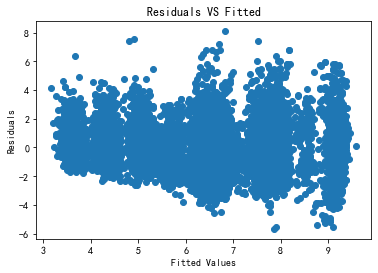

In [64]:
# 6.5.5 验证交叉对数模型是否正确

plt.title('Residuals VS Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(y_hat, residuals)

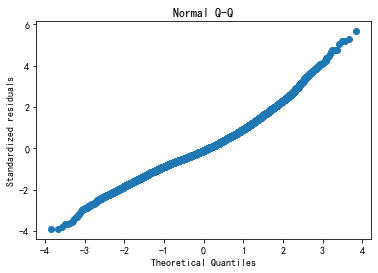

In [65]:
# 6.5.6 验证房价是否是正太分布


residuals_n = (residuals-np.mean(residuals))/np.std(residuals)
sorted_ = np.sort(residuals_n)
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)

plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized residuals')
plt.scatter(x_label, sorted_)

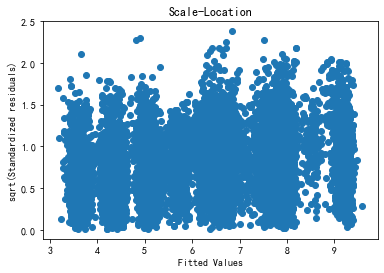

In [66]:
# 6.5.7 取平方根，除去符号影响重新验证模型是否符合线性模型

residuals_sq = np.sqrt(abs(residuals_n))

plt.title('Scale-Location')
plt.xlabel('Fitted Values')
plt.ylabel('sqrt(Standardized residuals)')
plt.scatter(y_hat, residuals_sq)

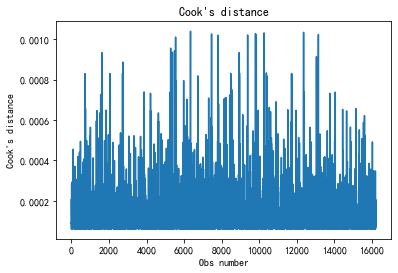

In [67]:
n = len(y)
y_m = np.mean(y)
Lyy = np.sum((y-y_m)**2)
Hii = 1/n+(y-y_m)**2/Lyy

plt.title("Cook's distance")
plt.xlabel('Obs number')
plt.ylabel("Cook's distance")
plt.plot(Hii.tolist())

In [68]:
# 假设需要在西城区买一套临近地铁的学区房，面积85平米。大概需要多少钱。

house_new = [1, 2, 85, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
price_new = np.exp(result.predict(house_new))
# 单价
price_new
print('房价预测值为：%.2f' % price_new, '万元/平方米')
print('房价预测值为：%.2f' % (85*price_new), '万元')

房价预测值为：9.28 万元/平方米
房价预测值为：788.67 万元
